In [115]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib as mpl

In [116]:
# over 1000 rows of data, so need to specify larger limit
url = "https://data.cdc.gov/resource/pp7x-dyj2.json"
entry_limit = "?$limit=50000"

r = requests.get(url + entry_limit)

In [117]:
deaths = pd.json_normalize(r.json())

In [118]:
deaths

,geoid,state,age,season,mmwr_year_week,deaths_from_pneumonia_and_influenza,all_deaths,pecent_of_deaths_due_to_pneumonia_or_influenza,pecent_complete,deaths_from_influenza,deaths_from_pneumonia,region
0,State,Maryland,All,2017-18,201831,64,949,6.7439409905,113.91902681,NaN,NaN,NaN
1,State,Texas,All,2017-18,201819,242,3664,6.6048034934,114.08514493,NaN,NaN,NaN
2,State,Pennsylvania,All,2017-18,201802,282,3185,8.8540031397,132.19363205,NaN,NaN,NaN
3,State,Colorado,All,2017-18,201818,41,702,5.8404558405,114.5518426,NaN,NaN,NaN
4,State,Maryland,All,2017-18,201807,87,1060,8.2075471698,127.24359158,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
32601,State,New York,All,2011-12,201209,159,1977,8.0424886191,108.44362909,NaN,NaN,NaN
32602,State,Kentucky,All,2016-17,201648,88,960,9.1666666667,118.49052147,NaN,NaN,NaN
32603,State,South Carolina,All,2014-15,201502,106,1075,9.8604651163,134.84761185,NaN,NaN,NaN
32604,Region,NaN,All,2013-14,201424,113,1479,7.6402974983,105.55591601,1,112,8


In [119]:
deaths.groupby('state')['mmwr_year_week'].unique()
# Each of the 50 states is present, also included are the District of Columbia and New York City

deaths.groupby('state')['mmwr_year_week'].size()
# All of the states have the same number of observations.

state
Alabama                 494
Alaska                  494
Arizona                 494
Arkansas                494
California              494
Colorado                494
Connecticut             494
Delaware                494
District of Columbia    494
Florida                 494
Georgia                 494
Hawaii                  494
Idaho                   494
Illinois                494
Indiana                 494
Iowa                    494
Kansas                  494
Kentucky                494
Louisiana               494
Maine                   494
Maryland                494
Massachusetts           494
Michigan                494
Minnesota               494
Mississippi             494
Missouri                494
Montana                 494
Nebraska                494
Nevada                  494
New Hampshire           494
New Jersey              494
New Mexico              494
New York                494
New York City           494
North Carolina          494
North Dakota  

In [120]:
deaths.groupby('mmwr_year_week')['state'].size()
#Checking from the year_week to the state. Each has 66 observations. What are the observations?

mmwr_year_week
200940    66
200941    66
200942    66
200943    66
200944    66
          ..
201908    66
201909    66
201910    66
201911    66
201912    66
Name: state, Length: 494, dtype: int64

In [121]:
deaths[deaths['mmwr_year_week'] == '200940'][deaths[deaths['mmwr_year_week'] == '200940']['geoid'] != "State"]
# There are 52 'state' observations (the 50 states plus D.C and NYC), the rest are regional and national observations.

,geoid,state,age,season,mmwr_year_week,deaths_from_pneumonia_and_influenza,all_deaths,pecent_of_deaths_due_to_pneumonia_or_influenza,pecent_complete,deaths_from_influenza,deaths_from_pneumonia,region
1256,Region,NaN,All,2009-10,200940,129,1726,7.4739281576,93.506002017,8,121,10
5575,Region,NaN,All,2009-10,200940,194,2255,8.6031042129,98.499399133,1,193,1
6042,Region,NaN,All,2009-10,200940,314,4132,7.5992255566,99.553983656,1,313,2
8246,Region,NaN,All,2009-10,200940,356,4991,7.1328391104,99.097489215,8,348,3
13924,National,NaN,0-17 years,2009-10,200940,55,801,6.8664169788,97.546212129,23,32,NaN
14398,Region,NaN,All,2009-10,200940,506,5732,8.8276343336,95.325881714,27,479,9
15804,Region,NaN,All,2009-10,200940,632,8212,7.6960545543,97.44773628,13,619,5
16224,Region,NaN,All,2009-10,200940,739,10210,7.2380019589,97.991394314,41,698,4
17659,Region,NaN,All,2009-10,200940,480,5397,8.8938299055,97.088063047,36,444,6
17730,Region,NaN,All,2009-10,200940,104,1461,7.1184120465,104.27125983,12,92,8


In [122]:
# Regions:
    # 1 - Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont
    # 2 - New York, New Jersey, Puerto Rico, the Virgin Islands
    # 3 - Delaware, District of Columbia, Maryland, Pennsylvania, Virginia, West Virginia
    # 4 - Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee
    # 5 - Illinois, Indiana, Minnesota, Michigan, Ohio, Wisconsin
    # 6 - Arkansas, Louisiana, New Mexico, Oklahoma, Texas
    # 7 - Iowa, Kansas, Missouri, Nebraska
    # 8 - Colorado, Montana, North Dakota, South Dakota, Utah, Wyoming
    # 9 - Arizona, California, Hawaii, Nevada, Guam, American Samoa
    # 10 - Alaska, Idaho, Oregon, Washington



# Check data for region 1 to see if region is redundant

deaths[(deaths['mmwr_year_week'] == '200940') & ((deaths['state'] == 'Connecticut') | (deaths['state'] == 'Maine') \
    | (deaths['state'] == 'Massachusetts') | (deaths['state'] == 'New Hampshire') | (deaths['state'] == 'Rhode Island') \
    | (deaths['state'] == 'Vermont'))]

,geoid,state,age,season,mmwr_year_week,deaths_from_pneumonia_and_influenza,all_deaths,pecent_of_deaths_due_to_pneumonia_or_influenza,pecent_complete,deaths_from_influenza,deaths_from_pneumonia,region
5139,State,Rhode Island,All,2009-10,200940,22,160,13.75,88.409475465,NaN,NaN,NaN
15957,State,Maine,All,2009-10,200940,16,239,6.6945606695,97.745729214,NaN,NaN,NaN
17862,State,Connecticut,All,2009-10,200940,42,584,7.1917808219,105.38148727,NaN,NaN,NaN
19239,State,Vermont,All,2009-10,200940,6,96,6.25,95.684105108,NaN,NaN,NaN
22559,State,New Hampshire,All,2009-10,200940,14,194,7.2164948454,97.188331456,NaN,NaN,NaN
26618,State,Massachusetts,All,2009-10,200940,94,982,9.5723014257,97.25214062,NaN,NaN,NaN


In [123]:
deaths[(deaths['geoid'] == 'Region') & (deaths['mmwr_year_week'] == '200940') & (deaths['region'] == '1')]

# Region adds specifically whether they were deaths from influenza or deaths from pneumonia

,geoid,state,age,season,mmwr_year_week,deaths_from_pneumonia_and_influenza,all_deaths,pecent_of_deaths_due_to_pneumonia_or_influenza,pecent_complete,deaths_from_influenza,deaths_from_pneumonia,region
5575,Region,NaN,All,2009-10,200940,194,2255,8.6031042129,98.499399133,1,193,1


In [124]:
# Is National data redundant?
deaths[(deaths['geoid'] == 'Region') & (deaths['mmwr_year_week'] == '200940')]

,geoid,state,age,season,mmwr_year_week,deaths_from_pneumonia_and_influenza,all_deaths,pecent_of_deaths_due_to_pneumonia_or_influenza,pecent_complete,deaths_from_influenza,deaths_from_pneumonia,region
1256,Region,NaN,All,2009-10,200940,129,1726,7.4739281576,93.506002017,8,121,10
5575,Region,NaN,All,2009-10,200940,194,2255,8.6031042129,98.499399133,1,193,1
6042,Region,NaN,All,2009-10,200940,314,4132,7.5992255566,99.553983656,1,313,2
8246,Region,NaN,All,2009-10,200940,356,4991,7.1328391104,99.097489215,8,348,3
14398,Region,NaN,All,2009-10,200940,506,5732,8.8276343336,95.325881714,27,479,9
15804,Region,NaN,All,2009-10,200940,632,8212,7.6960545543,97.44773628,13,619,5
16224,Region,NaN,All,2009-10,200940,739,10210,7.2380019589,97.991394314,41,698,4
17659,Region,NaN,All,2009-10,200940,480,5397,8.8938299055,97.088063047,36,444,6
17730,Region,NaN,All,2009-10,200940,104,1461,7.1184120465,104.27125983,12,92,8
19869,Region,NaN,All,2009-10,200940,179,2296,7.7961672474,97.589268646,2,177,7


In [125]:
deaths[(deaths['geoid'] == 'National') & (deaths['mmwr_year_week'] == '200940')]

# National adds age ranges

,geoid,state,age,season,mmwr_year_week,deaths_from_pneumonia_and_influenza,all_deaths,pecent_of_deaths_due_to_pneumonia_or_influenza,pecent_complete,deaths_from_influenza,deaths_from_pneumonia,region
13924,National,NaN,0-17 years,2009-10,200940,55,801,6.8664169788,97.546212129,23,32,NaN
21083,National,NaN,18-64 years,2009-10,200940,761,12356,6.1589511169,97.546212129,92,669,NaN
27220,National,NaN,All,2009-10,200940,3633,46412,7.8277169697,97.546212129,149,3484,NaN
27404,National,NaN,65 years and older,2009-10,200940,2817,33250,8.4721804511,97.546212129,34,2783,NaN


In [126]:
# Change the year_week column to two columns: year and week
deaths['year'] = deaths['mmwr_year_week'].str.findall(r'^\d{4}').str[0]
deaths['week'] = deaths['mmwr_year_week'].str.findall(r'\d{2}$').str[0]

In [127]:
# Season, percentages, and year_week are redundant

deaths = deaths.drop(['season', 'pecent_of_deaths_due_to_pneumonia_or_influenza', 'pecent_complete', 'mmwr_year_week'], axis = 1)

In [128]:
# Rename columns to tidy

deaths.columns = ['geo_level', 'state', 'age', 'pneu_flu_deaths', 'all_deaths', 'flu_deaths', 'pneu_deaths', 'region', 'year', 'week']

In [129]:
# Check data types and change them as necessary (floats are due to Nan values)

deaths.dtypes

geo_level          object
state              object
age                object
pneu_flu_deaths    object
all_deaths         object
flu_deaths         object
pneu_deaths        object
region             object
year               object
week               object
dtype: object

In [130]:
deaths['pneu_flu_deaths'] = deaths['pneu_flu_deaths'].astype(float)
deaths['all_deaths'] = deaths['all_deaths'].astype(float)
deaths['flu_deaths'] = deaths['flu_deaths'].astype(float)
deaths['pneu_deaths'] = deaths['pneu_deaths'].astype(float)
deaths['year'] = deaths['year'].astype(int)
deaths['week'] = deaths['week'].astype(int)

In [131]:
deaths_clean = deaths[['geo_level', 'region', 'state', 'year', 'week', 'age', 'flu_deaths', 'pneu_deaths', 'pneu_flu_deaths', 'all_deaths']]

In [132]:
deaths_clean.to_csv('./deaths.csv')

In [146]:
total_deaths = deaths_clean[(deaths_clean['geo_level'] == 'State') & (deaths_clean['year'] != 2009) \
    & (deaths_clean['year'] != 2019)].groupby(['week', 'year']).sum(numeric_only = True).reset_index()

[Text(0.5, 0, 'Week of the Year'),
 Text(0, 0.5, 'Total Deaths'),
 Text(0.5, 1.0, 'Deaths due to Pneumonia and Influenza \n in the United States by Week and Year')]

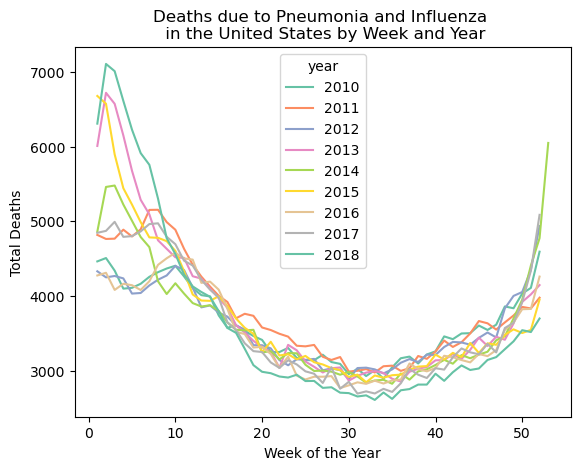

In [148]:
pneu_flu_deaths = sns.lineplot(x = total_deaths['week'], y = total_deaths['pneu_flu_deaths'], hue = total_deaths['year'], palette = 'Set2')
pneu_flu_deaths.set(xlabel = "Week of the Year", ylabel = "Total Deaths", title = "Deaths due to Pneumonia and Influenza \n in the United States by Week and Year")

In [138]:
total_deaths

,week,year,flu_deaths,pneu_deaths,pneu_flu_deaths,all_deaths
0,1,2010,NaN,NaN,85.865385,981.115385
1,1,2011,NaN,NaN,92.673077,1021.326923
2,1,2012,NaN,NaN,83.326923,982.730769
3,1,2013,NaN,NaN,115.538462,1136.826923
4,1,2014,NaN,NaN,93.519231,1029.596154
...,...,...,...,...,...,...
464,52,2015,NaN,NaN,76.057692,1011.576923
465,52,2016,NaN,NaN,81.961538,1107.980769
466,52,2017,NaN,NaN,97.826923,1174.807692
467,52,2018,NaN,NaN,71.192308,1067.403846
